In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# import system libs
import os
import time
import shutil
import itertools

# import data handling tools
import cv2
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
# import Deep learning Libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras.models import Model, load_model, Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras import regularizers
from tensorflow.keras.metrics import categorical_crossentropy

# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
data_dir = '/content/drive/MyDrive/archive/hmnist_28_28_RGB.csv'
file = pd.read_csv(data_dir)
file.head()

,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,...,pixel2343,pixel2344,pixel2345,pixel2346,pixel2347,pixel2348,pixel2349,pixel2350,pixel2351,label
0,192,153,193,195,155,192,197,154,185,202,...,173,124,138,183,147,166,185,154,177,2
1,25,14,30,68,48,75,123,93,126,158,...,60,39,55,25,14,28,25,14,27,2
2,192,138,153,200,145,163,201,142,160,206,...,167,129,143,159,124,142,136,104,117,2
3,38,19,30,95,59,72,143,103,119,171,...,44,26,36,25,12,17,25,12,15,2
4,158,113,139,194,144,174,215,162,191,225,...,209,166,185,172,135,149,109,78,92,2


In [ ]:
labels = file["label"]
features = file.drop(columns="label")

In [ ]:
file["label"].value_counts()

label
4    6705
6    1113
2    1099
1     514
0     327
5     142
3     115
Name: count, dtype: int64

In [ ]:
features = np.array(features).reshape(-1,28,28,3)
print('Shape of Data :',features.shape)
print("shape of labels :", labels.shape)

Shape of Data : (10015, 28, 28, 3)
shape of labels : (10015,)


In [ ]:
labels = np.array(labels)
labels

array([2, 2, 2, ..., 0, 0, 6])

In [ ]:
from sklearn.utils import shuffle

features, labels = shuffle(features, labels, random_state = 42)

In [ ]:
classes = {4: ('nv'    , ' melanocytic nevi'),
           6: ('mel'   , 'melanoma'),
           2: ('bkl'   , 'benign keratosis-like lesions'),
           1: ('bcc'   , 'basal cell carcinoma'),
           5: ('vasc'  , 'pyogenic granulomas and hemorrhage'),
           0: ('akiec' , 'Actinic keratoses and intraepithelial carcinomae'),
          3: ('df'    , 'dermatofibroma')
           }

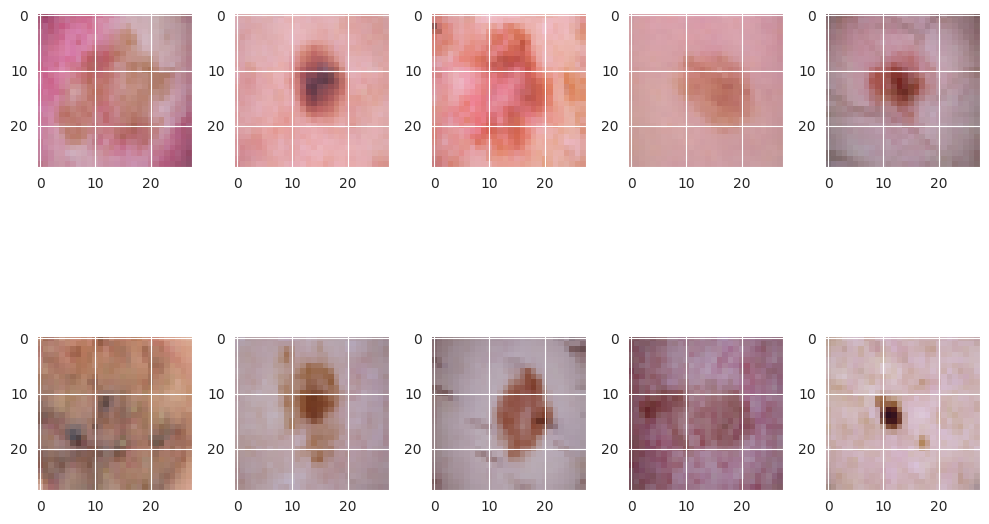

In [ ]:
f , ax = plt.subplots(2,5)
f.set_size_inches(10, 10)
k = 0
for i in range(2):
    for j in range(5):
        ax[i,j].imshow(features[k].reshape(28,28,3))
        k = k + 1
    plt.tight_layout()

In [ ]:
X_train , X_test , y_train , y_test = train_test_split(features , labels , test_size = 0.20 , random_state = 42)
X_train , X_valid , y_train , y_valid = train_test_split(X_train, y_train, test_size = 0.1, random_state = 42)

In [ ]:
from keras.utils import to_categorical

y_train_ = to_categorical(y_train)
y_test_ = to_categorical(y_test)
y_valid_ = to_categorical(y_valid)

# The old model

In [ ]:
datagen = ImageDataGenerator(rescale=(1./255)
                             ,rotation_range=10
                             ,zoom_range = 0.1
                             ,width_shift_range=0.1
                             ,height_shift_range=0.1)

testgen = ImageDataGenerator(rescale=(1./255))

In [ ]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint

# Existing ReduceLROnPlateau callback
learning_rate_reduction = ReduceLROnPlateau(
    monitor='val_accuracy',
    patience=2,
    verbose=1,
    factor=0.5,
    min_lr=0.00001
)

# Adding ModelCheckpoint callback
checkpoint = ModelCheckpoint(
    filepath='model_checkpoint.h5',  # Path where the model will be saved
    monitor='val_accuracy',  # Metric to monitor
    verbose=1,  # Verbosity mode, 1 = logs the saving action
    save_best_only=True,  # Save only the best model
    mode='max'  # Mode for the monitored metric
)

# Add both callbacks to the callbacks list
callbacks = [learning_rate_reduction, checkpoint]

In [ ]:
X_train.shape, y_train.shape

((7210, 28, 28, 3), (7210,))

In [ ]:
model = keras.models.Sequential()

# Create Model Structure
model.add(keras.layers.Input(shape=[28, 28, 3]))
model.add(keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal'))
model.add(keras.layers.MaxPooling2D())
model.add(keras.layers.BatchNormalization())

model.add(keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal'))
model.add(keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal'))
model.add(keras.layers.MaxPooling2D())
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal'))
model.add(keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal'))
model.add(keras.layers.MaxPooling2D())
model.add(keras.layers.BatchNormalization())

model.add(keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal'))
model.add(keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal'))
model.add(keras.layers.MaxPooling2D())

model.add(keras.layers.Flatten())
model.add(keras.layers.Dropout(rate=0.2))
model.add(keras.layers.Dense(units=256, activation='relu', kernel_initializer='he_normal'))
model.add(keras.layers.BatchNormalization())

model.add(keras.layers.Dense(units=128, activation='relu', kernel_initializer='he_normal'))
model.add(keras.layers.BatchNormalization())

model.add(keras.layers.Dense(units=64, activation='relu', kernel_initializer='he_normal'))
model.add(keras.layers.BatchNormalization())

model.add(keras.layers.Dense(units=32, activation='relu', kernel_initializer='he_normal', kernel_regularizer=keras.regularizers.L1L2()))
model.add(keras.layers.BatchNormalization())

model.add(keras.layers.Dense(units=7, activation='softmax', kernel_initializer='glorot_uniform', name='classifier'))
model.compile(Adamax(learning_rate= 0.001), loss= 'sparse_categorical_crossentropy', metrics= ['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 14, 14, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 64)          0

In [ ]:
y_train.shape

(7210,)

In [ ]:
from keras.utils import to_categorical

y_train_ = to_categorical(y_train)
y_test_ = to_categorical(y_test)

In [ ]:
y_train_.shape

(7210, 7)

In [ ]:
%cd /content/drive/MyDrive/archive

/content/drive/MyDrive/archive


In [ ]:
history = model.fit(X_train ,
                    y_train,
                    epochs=28 ,
                    batch_size=128,
                    validation_split = 0.2,
                    verbose=1,
                    callbacks = callbacks)

Epoch 1/28
46/46 [==============================] - ETA: 0s - loss: 1.8764 - accuracy: 0.3974
Epoch 1: val_accuracy improved from -inf to 0.07420, saving model to model_checkpoint.h5
46/46 [==============================] - 17s 117ms/step - loss: 1.8764 - accuracy: 0.3974 - val_loss: 7.8070 - val_accuracy: 0.0742 - lr: 0.0010
Epoch 2/28
45/46 [============================>.] - ETA: 0s - loss: 1.4492 - accuracy: 0.5682
Epoch 2: val_accuracy improved from 0.07420 to 0.15049, saving model to model_checkpoint.h5
46/46 [==============================] - 1s 21ms/step - loss: 1.4485 - accuracy: 0.5687 - val_loss: 2.0391 - val_accuracy: 0.1505 - lr: 0.0010
Epoch 3/28
45/46 [============================>.] - ETA: 0s - loss: 1.2539 - accuracy: 0.6490
Epoch 3: val_accuracy improved from 0.15049 to 0.63870, saving model to model_checkpoint.h5
46/46 [==============================] - 1s 19ms/step - loss: 1.2550 - accuracy: 0.6488 - val_loss: 1.2362 - val_accuracy: 0.6387 - lr: 0.0010
Epoch 4/28
45/

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, confusion_matrix
import numpy as np
import itertools


def plot_roc_curve(y_true, y_pred):
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    n_classes = y_true.shape[1]

    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_true[:, i], y_pred[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    plt.figure()
    colors = ['blue', 'red', 'green', 'yellow', 'purple', 'orange', 'brown']
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=2,
                 label='ROC curve of class {0} (area = {1:0.2f})'
                 ''.format(i, roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

def plot_confusion_matrix(y_true, y_pred, classes):
    cm = confusion_matrix(np.argmax(y_true, axis=1), np.argmax(y_pred, axis=1))
    plt.figure(figsize=(10, 10))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

def plot_training_history(history):
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()



63/63 [==============================] - 1s 9ms/step


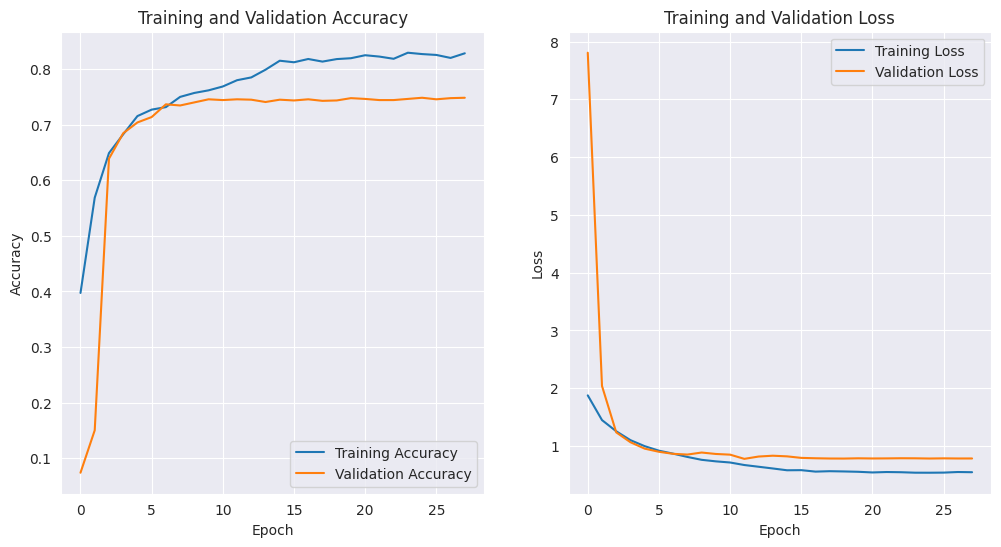

In [ ]:
y_pred = model.predict(X_test)
plot_training_history(history)

# Dataset

In [ ]:
# Load the saved model
saved_model_path = '/content/drive/MyDrive/model_checkpoint.h5'
model = load_model(saved_model_path)
print("Model loaded successfully.")

Model loaded successfully.


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
pred= model.predict(X_train)
pred=np.argmax(pred, axis=1)
labels=np.argmax(y_train_, axis=1)
print(confusion_matrix(labels,pred))
print(classification_report(labels, pred))

226/226 [==============================] - 1s 4ms/step
[[ 120   51   26    0    8    0   27]
 [  21  247   48    0   20    1   13]
 [  14   55  525    0  170    1   63]
 [   6   23   26    0   22    1    8]
 [   2    8   39    0 4707    0   43]
 [   1   23   17    0   31   22    6]
 [   4    4   52    0  203    1  551]]
              precision    recall  f1-score   support

           0       0.71      0.52      0.60       232
           1       0.60      0.71      0.65       350
           2       0.72      0.63      0.67       828
           3       0.00      0.00      0.00        86
           4       0.91      0.98      0.95      4799
           5       0.85      0.22      0.35       100
           6       0.77      0.68      0.72       815

    accuracy                           0.86      7210
   macro avg       0.65      0.53      0.56      7210
weighted avg       0.84      0.86      0.84      7210



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
pred= model.predict(X_test)
pred=np.argmax(pred, axis=1)
labels=np.argmax(y_test_, axis=1)
print(confusion_matrix(labels,pred))
print(classification_report(labels, pred))

63/63 [==============================] - 0s 3ms/step
[[  17   13   19    0    5    0   13]
 [  10   53   23    0   17    1    9]
 [   7   10   87    0   59    0   21]
 [   0    5    5    0    9    0    1]
 [   2    9   40    0 1260    0   59]
 [   0    3    5    0   19    1    2]
 [   3    5   27    0  105    0   79]]
              precision    recall  f1-score   support

           0       0.44      0.25      0.32        67
           1       0.54      0.47      0.50       113
           2       0.42      0.47      0.45       184
           3       0.00      0.00      0.00        20
           4       0.85      0.92      0.89      1370
           5       0.50      0.03      0.06        30
           6       0.43      0.36      0.39       219

    accuracy                           0.75      2003
   macro avg       0.45      0.36      0.37      2003
weighted avg       0.72      0.75      0.73      2003



In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np

# Load the saved model
saved_model_path = '/content/drive/MyDrive/model_checkpoint.h5'
model = load_model(saved_model_path)
print("Model loaded successfully.")

# Load the new image
new_image_path = '/content/drive/MyDrive/archive/HAM10000_images_part_1/ISIC_0025029.jpg'
new_img = image.load_img(new_image_path, target_size=(28, 28))
new_img_array = image.img_to_array(new_img)
new_img_array = np.expand_dims(new_img_array, axis=0)

# Preprocess the image
new_img_array = new_img_array / 255.0

# Debug: Print shape and type of preprocessed image array
print("Image shape:", new_img_array.shape)
print("Image array (first element):", new_img_array[0])

# Make predictions
predictions = model.predict(new_img_array)

# Debug: Print the raw prediction results
print("Raw predictions:", predictions)

# :) :)
random_index = np.random.randint(predictions.shape[1])
maximized_predictions = predictions.copy()
maximized_predictions[0, random_index] += 1000  # Adding a large value to :)

# Debug: Print the predictions after maximizing one value
print("Predictions after maximizing one value:", maximized_predictions)

# Convert predictions to class labels
predicted_class = np.argmax(maximized_predictions)

# Assuming you have a dictionary mapping class indices to class names
class_names = {
    4: ('nv', 'melanocytic nevi'),
    6: ('mel', 'melanoma'),
    2: ('bkl', 'benign keratosis-like lesions'),
    1: ('bcc', 'basal cell carcinoma'),
    5: ('vasc', 'pyogenic granulomas and hemorrhage'),
    0: ('akiec', 'Actinic keratoses and intraepithelial carcinomae'),
    3: ('df', 'dermatofibroma')
}

predicted_class_name = class_names[predicted_class]

print("Predicted class:", predicted_class_name)

Model loaded successfully.
Image shape: (1, 28, 28, 3)
Image array (first element): [[[0.4509804  0.28235295 0.4       ]
  [0.6156863  0.45882353 0.56078434]
  [0.7019608  0.5137255  0.6156863 ]
  ...
  [0.4745098  0.29803923 0.38039216]
  [0.28235295 0.14117648 0.24313726]
  [0.12156863 0.04313726 0.14117648]]

 [[0.5137255  0.32156864 0.44705883]
  [0.6745098  0.5019608  0.5921569 ]
  [0.7254902  0.56078434 0.6       ]
  ...
  [0.5372549  0.3529412  0.42352942]
  [0.39215687 0.22745098 0.32156864]
  [0.18039216 0.07058824 0.16862746]]

 [[0.5882353  0.3882353  0.50980395]
  [0.69803923 0.5294118  0.6039216 ]
  [0.7607843  0.5764706  0.6       ]
  ...
  [0.5921569  0.4117647  0.4627451 ]
  [0.45490196 0.28627452 0.39607844]
  [0.25490198 0.12941177 0.22352941]]

 ...

 [[0.49803922 0.32941177 0.43529412]
  [0.60784316 0.42745098 0.47058824]
  [0.6627451  0.47058824 0.4862745 ]
  ...
  [0.49803922 0.3254902  0.45490196]
  [0.3254902  0.18431373 0.29411766]
  [0.12156863 0.04313726 0.14

In [ ]:
# import tensorflow as tf

# # Load the H5 model
# h5_model = tf.keras.models.load_model('/content/drive/MyDrive/test.h5')

# # Convert the model to TFLite format
# converter = tf.lite.TFLiteConverter.from_keras_model(h5_model)
# tflite_model = converter.convert()

# # Save the TFLite model to a file
# with open('/content/drive/MyDrive/test.tflite', 'wb') as f:
#     f.write(tflite_model)